In [127]:
# Import all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px
from scipy.stats import norm


In [128]:
df = pd.read_csv('transport_data_2015_january.csv')
df.head(2)

,Unnamed: 0,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
0,0,2015-01-02 00:00:00,AA,1.0,JFK,LAX,-19.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,381.0
1,1,2015-01-03 00:00:00,AA,1.0,JFK,LAX,-39.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,358.0


## Distributions

In [129]:
# first we will be looking a distributions of airlines that are late 
# Before that lets create a column to find the flights that are late and not early as the arrival column has both values as of this moment.

df['delayed'] = df['arr_delay'].apply(lambda x:x>0)

# Now that we have a series of True or False values against delayed flights. we can use them to count the number of delayed flights by airlines.
delayed_flights = df[df['delayed']==True]

dis_1 = delayed_flights['unique_carrier'].value_counts()
pd.DataFrame(dis_1)


,unique_carrier
WN,21150
EV,11371
OO,10804
AA,9841
DL,9803
UA,8624
MQ,8060
US,6353
B6,4401
NK,2133


#### Distribution of unique carriers that are delayed

C:\Users\Kumarappan M\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='unique_carrier', ylabel='Density'>

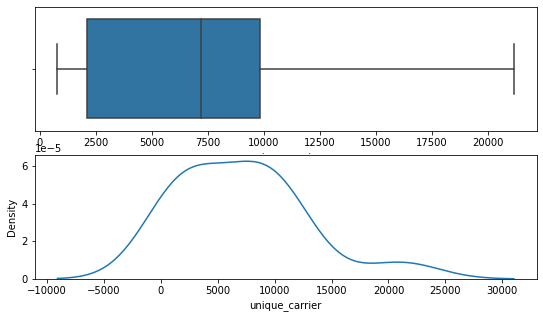

In [130]:
# density plot showign distribution of delayed carriers 
plt.figure(figsize = (9, 5))

plt.subplot(211)
sns.boxplot(dis_1)

plt.subplot(212)
sns.kdeplot(dis_1)

In [155]:
# lets visualize their proportions next 
# size() counts along a axis and the unstack() pivots the inner most levels

proportion = df.groupby(['unique_carrier','delayed']).size().unstack()
proportion.reset_index()

# Now lets add a column for total and percentage of delayed flights 

proportion['total_flights'] = proportion[True]+proportion[False]

proportion['percent_delayed'] = proportion[True]/proportion['total_flights']*100


# Now lets find the proportion of these flights 

proportion['proportion_d'] = proportion[True]/proportion['total_flights']
proportion.sort_values('proportion_d',ascending=False)

	

delayed,False,True,total_flights,percent_delayed,proportion_d
unique_carrier,,,,,
MQ,4692,8060,12752,63.205772,0.632058
F9,1103,1848,2951,62.622840,0.626228
NK,1550,2133,3683,57.914743,0.579147
AA,8912,9841,18753,52.476937,0.524769
UA,7885,8624,16509,52.238173,0.522382
OO,9977,10804,20781,51.989798,0.519898
EV,10596,11371,21967,51.764010,0.517640
HA,1351,1354,2705,50.055453,0.500555
WN,21789,21150,42939,49.255921,0.492559


##### The above table shows a different perspective compared to the first table. In the first table WN ( south west airlines) had the most number of delayed flighs but here it barely crosses the middle of the pack with respect to percent of delayed flights in their respective airlines.

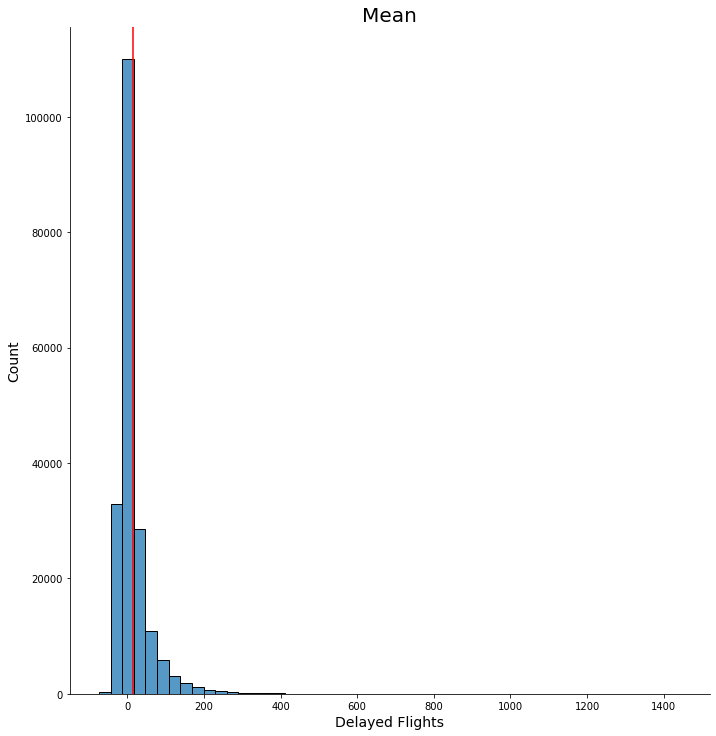

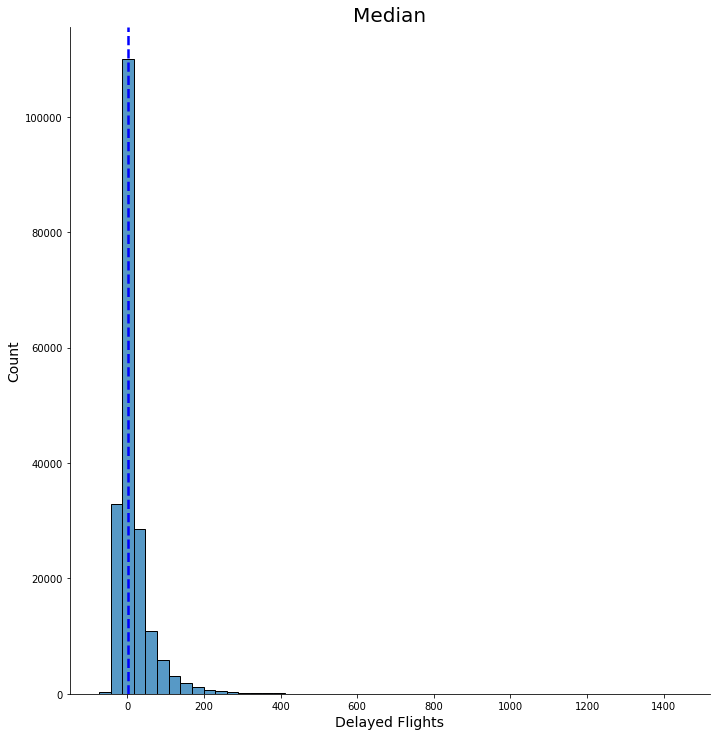

In [171]:
sns.displot(df,
            x = 'arr_delay',
            bins=50,
           height=10)
plt.title('Mean',size=20)
plt.xlabel("Delayed Flights", size=14)
plt.ylabel("Count", size=14)
plt.axvline(x=df.arr_delay.mean(),
            color='red')

sns.displot(df,
            x = "arr_delay",
            bins=50,
           height=10)
plt.title('Median',size=20)
plt.xlabel("Delayed Flights", size=14)
plt.ylabel("Count", size=14)
plt.axvline(x=df.arr_delay.median(),
            color='blue',
            ls='--', 
            lw=2.5)

## Location

* Mean
* Median
* Mode
* Percentiles

In [132]:
# Mean  gives you an average of how long each flight was delayed for

mean_delay = df.pivot_table(columns='unique_carrier' , values='arr_delay', aggfunc=np.mean).value_counts(ascending=False)
pd.DataFrame(mean_delay)


,,,,,,,,,,,,,,0
AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,
15.616299,1.731951,13.576129,4.118949,18.35852,28.836953,6.458937,35.627406,22.77967,19.031663,16.094772,7.671557,3.833908,11.273536,1


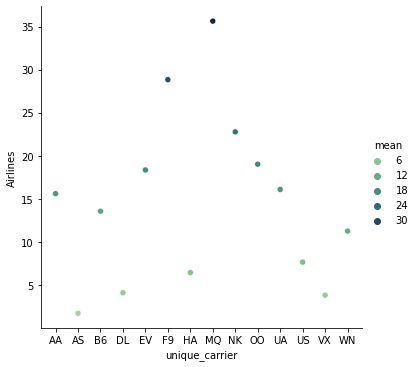

In [133]:
mean_1 = df.groupby('unique_carrier')['arr_delay'].mean().reset_index(name='mean') 
harker = sns.relplot(x="unique_carrier", y="mean", hue= 'mean',palette="ch:r=-.5,l=.75",data=mean_1)
harker.set_titles("Distribution Scatter Plot of Mean ")
harker.set_ylabels("Mean", clear_inner=False)
harker.set_ylabels("Airlines", clear_inner=False)


In [134]:
south_west = df[df['unique_carrier'] == 'WN']['arr_delay']
south_west.describe()

count    42020.000000
mean        11.273536
std         36.438970
min        -55.000000
25%         -9.000000
50%          1.000000
75%         19.000000
max        535.000000
Name: arr_delay, dtype: float64

### Inference

* count: there are 42,020 rows in the dataset, which is filtered to only show Southwest (WN).
* mean: the average time a flight is delayed in this particular airline.
* std: the standard deviation.
* min: the shortest delay in the dataset. 
* 25%: the 25th percentile. 25% of delays were lower than -9.00. ( - meaning it was early )
* 50%: the 50th percentile, or the median. 50% of delays were lower than 1.00.
* 75%: the 75th percentile. 75% of delays were lower than 19.00.
* max: the longest delay in the dataset: 535.00.

## Histogram

#### South west airlines delay histogram

<AxesSubplot:>

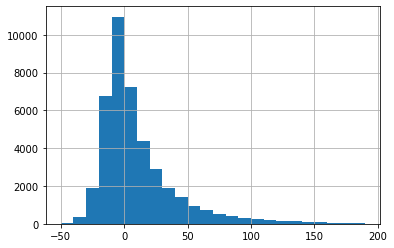

In [135]:
# setting up the bins parameter
bin_values = np.arange(start=-50, stop=200, step=10)

# histogram to display flight delays every 10 mins

south_west_hist = df[df.unique_carrier=='WN']
south_west_hist.arr_delay.hist(bins=bin_values)

#### South west airlines Vs US airlines Vs Envoy airlines delay histogram

unique_carrier
MQ    AxesSubplot(0.125,0.125;0.775x0.755)
US    AxesSubplot(0.125,0.125;0.775x0.755)
WN    AxesSubplot(0.125,0.125;0.775x0.755)
Name: arr_delay, dtype: object

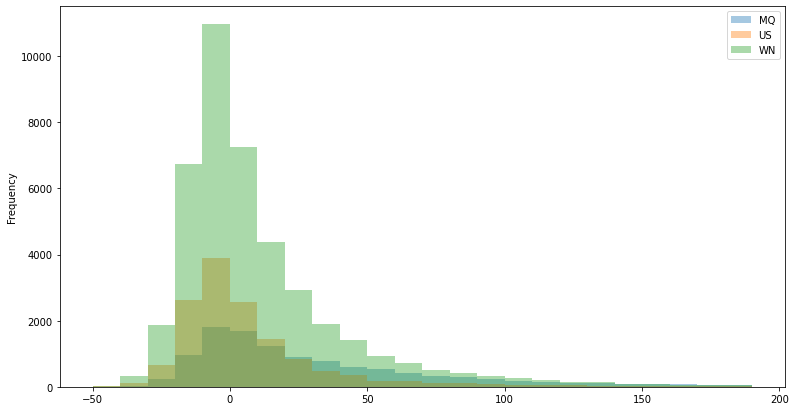

In [136]:
# subsetting data frame for south west and US airlines and Envoy 

WN_US_airlines = df['unique_carrier'].isin(['WN','US','MQ'])
WN_US_airlines_df = df[WN_US_airlines]

# Create a stacked histogram with both US and WN airlines

stacked_hist = WN_US_airlines_df.groupby('unique_carrier')['arr_delay']
stacked_hist.plot(kind='hist',bins=bin_values,figsize=[13,7],alpha=0.4,legend=True)

In [137]:
des = stacked_hist.describe()
des


,count,mean,std,min,25%,50%,75%,max
unique_carrier,,,,,,,,
MQ,11275.0,35.627406,58.444090,-51.0,-2.0,17.0,53.0,788.0
US,13972.0,7.671557,34.672795,-59.0,-10.0,-1.0,13.0,621.0
WN,42020.0,11.273536,36.438970,-55.0,-9.0,1.0,19.0,535.0


From the above table you can infere that the delays on Envoy airlines are more than the other two airlines meaning the values are spread out. We arrive at this conclusion by looking at the standard deviation , you clearly see the gap between Envoy and the other airlines.

## Variance

#### Standard Deviation
Simply put standard deviation is the square root of Variance , and in this case is shows how the flight delays are spread out.

In [138]:
envoy_air = print ('Envoy Air'), des.loc['MQ']['std'], 'minutes from the mean', des.loc['MQ']['mean']
US_air = print ('US Airways'), des.loc['US']['std'], 'minutes from the mean', des.loc['US']['mean']
south_west_air = print ('South West Airways'), des.loc['WN']['std'], 'minutes from the mean', des.loc['WN']['mean']

envoy_air,US_air,south_west_air



Envoy Air
US Airways
South West Airways


((None, 58.44409039663552, 'minutes from the mean', 35.62740576496674),
 (None, 34.67279466146994, 'minutes from the mean', 7.671557400515316),
 (None, 36.438969785966094, 'minutes from the mean', 11.273536411232746))

* As you can see above Envoy airways has a 35.6 mean value and 58.4 deviation , meaning 68.2% of the flights at envoy airlines are between 23 (58.444 - 35.627) minutes early or 93 (58.444 + 35.627) minutes delay.

* As you can see above US airways has a 7.6 mean value and 34.6 deviation , meaning 68.2% of the flights at US airlines are between 27 (34.6 - 7.6) minutes early or 42 (34.6 + 7.6) minutes delay.

* As you can see above South west airways has a 11.2 mean value and 36.4 deviation , meaning 68.2% of the flights at South west airlines are between 25 (36.4 - 11.2) minutes early or 47 (36.4 + 11.2) minutes delay.

* From the above information we can infer that US airlines has the lowest dispersion rate among all airlines compared.

## Box Plots

#### Lets look at box plots of high volume airports

In [139]:
# lets look at flight delays segregated by airports
crowded = df.origin.value_counts()[:20]

# lets convert this to list so we can use this list with the isin() function.
airport_list = crowded.index.tolist()

# lets subset for busiest airports

busy_airports = df[df.origin.isin(airport_list)]

# Lets look at the airport of origin for these long flight delays

top_volume = busy_airports.pivot_table(index='flight_date', columns='origin', values='arr_delay')

# Summary statistics of these busy airports

top_volume.describe()

origin,ATL,BOS,CLT,DEN,DFW,DTW,EWR,FLL,IAH,JFK,LAS,LAX,LGA,MCO,MSP,ORD,PHX,SEA,SFO,SLC
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,7.049522,11.609776,7.350537,22.283364,18.216483,16.044343,17.213870,6.938287,11.216083,14.613638,11.723369,11.302481,17.699715,11.925022,9.627240,39.274123,9.223535,6.526833,11.517644,5.083884
std,12.798122,15.004838,7.499172,16.171575,12.854437,15.286101,18.718574,10.452380,11.488504,22.619487,11.574100,10.193057,23.428830,12.647029,14.971524,28.195169,7.051518,4.795902,8.742399,5.910367
min,-5.473046,-9.384106,-1.681250,-0.638838,2.690160,-6.842809,-5.456446,-7.118721,-0.530120,-14.911877,-3.695418,-2.958559,-11.311475,-2.242991,-7.691030,2.735369,-1.161593,-2.761506,0.621622,-5.717949
25%,0.944276,3.590580,0.509317,14.569873,8.591810,2.584906,0.422680,-0.543307,1.571121,1.259259,4.487245,5.442446,-0.883234,1.885350,1.193333,22.578704,2.213483,4.372180,5.289216,2.003356
50%,3.033099,8.254777,5.789286,20.526899,11.534626,20.593060,15.419463,3.360360,8.450505,4.297101,12.710526,8.144112,15.606426,8.977918,6.834459,37.995702,8.000000,7.318519,9.425178,3.878893
75%,6.361725,21.045603,13.294964,29.899200,28.705263,24.696594,22.674051,13.711864,17.064904,31.882979,17.229381,16.500000,34.984177,17.511364,19.461279,46.355837,13.665217,9.467925,13.225806,7.051546
max,42.375375,43.310580,23.325077,52.495238,38.360104,35.771626,53.617978,25.293651,39.844037,55.445578,40.793103,28.159016,61.165049,39.847025,47.264605,96.695578,20.180085,13.771812,27.918719,15.503125


<AxesSubplot:>

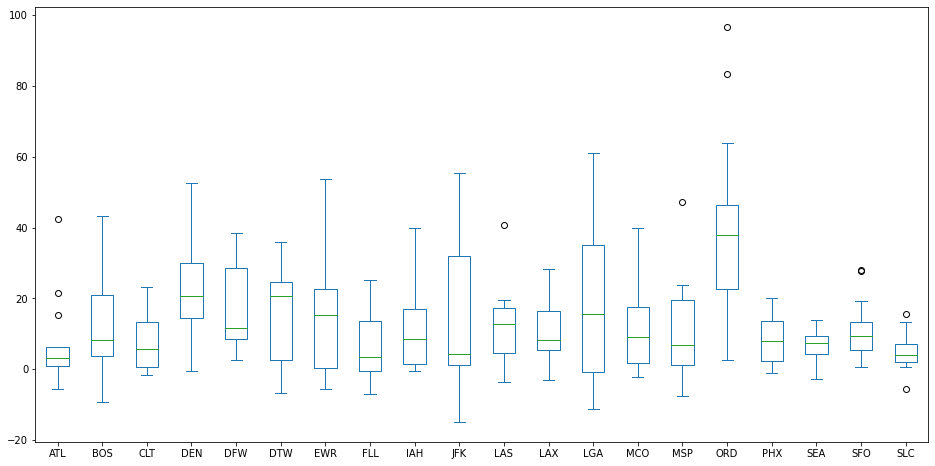

In [140]:
box_plot_air = top_volume
box_plot_air.plot(kind='box', figsize=[16,8])

It simpler to compare the data now that its in a box plot , wouldnt you agree? . John F Kennedy airport (JFK) had a notable distriibution of delays while LGA ( Laguardia ) airport for example remained evenly distributed. ORD ( O'Hare airport) on the other had was a completely different story as it was 2-3 times more delayed than the rest though out.

## Covariance
#### covariance is defined as the directional relationship between two variables a and b

<AxesSubplot:xlabel='distance', ylabel='actual_elapsed_time'>

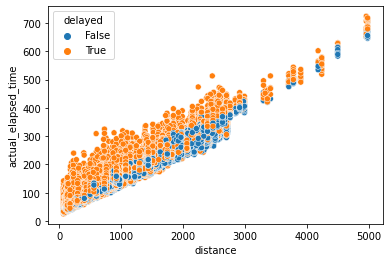

In [141]:
# lets plot a scatter plot of diffrent dimmensions in the data frame to see how they relate to each other. First we will start with columns distance and actual_elapsed_time

sns.scatterplot(data=busy_airports,x='distance',y='actual_elapsed_time',hue='delayed')

As you can see there is a positive covariance between distance and actual time elapsed. In ther words these variables tend to move in the same direction either upward or down ward.

<AxesSubplot:xlabel='actual_elapsed_time', ylabel='arr_delay'>

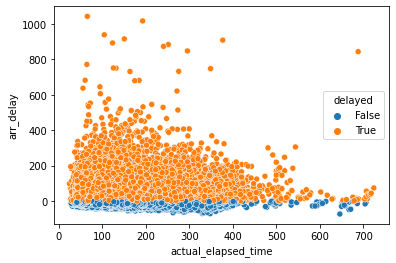

In [142]:
# Now lets look at two more variables 

sns.scatterplot(data=busy_airports,y='arr_delay',x='actual_elapsed_time',hue='delayed')

Now this plot has a negative covariance , as the elapsed time increases the arrival delay also decreases to an extent.

## Correlation

The correlation between two random variables measures both the strength and direction of a linear relationship that exists between them. There are two ways to measure correlation:

* Pearson Correlation Coefficient — captures the strength and direction of the linear association between two continuous variables

* Spearman’s Rank Correlation Coefficient—determines the strength and direction of the monotonic relationship which exists between two ordinal (categorical) or continuous variables.


                     Unnamed: 0  flight_num  arr_delay  cancelled  distance  \
Unnamed: 0             1.000000    0.430852   0.088400   0.104023 -0.237150   
flight_num             0.430852    1.000000   0.065973   0.086232 -0.351688   
arr_delay              0.088400    0.065973   1.000000        NaN -0.043531   
cancelled              0.104023    0.086232        NaN   1.000000 -0.076620   
distance              -0.237150   -0.351688  -0.043531  -0.076620  1.000000   
carrier_delay          0.003640    0.020999   0.562874        NaN  0.027166   
weather_delay          0.019708    0.002420   0.288020        NaN -0.019697   
late_aircraft_delay    0.020064    0.070512   0.559827        NaN -0.069596   
nas_delay              0.074343   -0.018072   0.273016        NaN  0.008921   
security_delay        -0.004073   -0.005984   0.001772        NaN  0.012578   
actual_elapsed_time   -0.205306   -0.317914   0.025754        NaN  0.962643   
delayed                0.065500    0.037498   0.5377

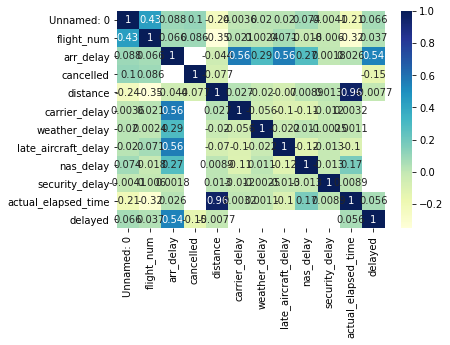

In [143]:
# now lets show the correlation of the data through a heat map

print(df.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

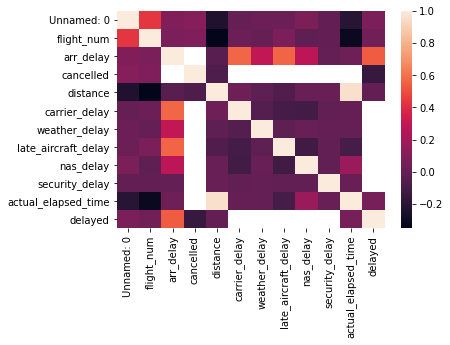

In [144]:
# lets do another heatmap

dataplot=sns.heatmap(df.corr())
  
# displaying heatmap
plt.show()

As you can see from the above heat map flights delayed are highly correlated with different reasons such as security delay , national air system delay , weather delay , carrier delay , we can also observe the time elasped is highly correlated with the distance of the the travel and the time at which the flight arrives.

## EDA ( Explanatory Data Anslysis )

#### 1. Total number of flights delayed by airlines 

In [145]:
# Total flights delayed per their respective carrier.

proportion1= proportion.reset_index()

proportion1.unique_carrier.replace({'AA':'American Airlines Inc',
'OO': 'SkyWest Airlines Inc',
'DL': 'Delta Air Lines Inc',
'NK': 'Spirit Air Lines',
'HA': 'Hawaiian Airlines Inc',
'WN': 'Southwest Airlines Co',
'B6': 'JetBlue Airways',
'US': 'US Airways Inc',
'AS' :'Alaska Airlines Inc',
'MQ' :'Envoy Air',
'F9' :'Frontier Airlines Inc',
'VX': 'Virgin America',
'EV': 'ExpressJet Airlines Inc',
'UA': 'United Air Lines Inc'},inplace=True)

size1 = proportion['percent_delayed']/2

fig = px.scatter(proportion1, x="percent_delayed", y=True,
	         size=size1, color="unique_carrier",
                 hover_name="unique_carrier", log_x=True, size_max=60,labels={
                     "percent_delayed": "Delayed Flights Percentage %",
                     "True": "Total flights Delayed ",
                     "unique_carrier": "Airlines"
                 },
                title="Airlines to avoid")
fig.show()



#### 2. Find the airport with the most amount air traffic in other words late or delayed flights

In [146]:
# plot the most busy airports with the largest number of delayed flights

df2 = df.dropna()

# subset for delayed flights and groub by origin destination to get a count of delayed flights from that particular location

df2 =df2[['origin','delayed','arr_delay']]
plot1 = df2[df2['delayed']==True].groupby('origin').size().reset_index(name='counts')
plot1

# plot
fig = px.scatter(plot1,x='origin',y='counts',size='counts', color='counts',hover_name='origin',labels={
                     "origin": "Origin Airport",
                     "counts": "Number of delayed Flights",
                     
                 },
                title="Airports to avoid")
fig.show()


From the above scatter plot we can confirm that the 4 most busiest airports with a large numner of delayed flights are ORD , DFW , DEN , ATL. These are the airports to avoid.

#### 3. Delayed Flights by Day of week

In [147]:
from datetime import datetime
days = {0:'Monday', 1:'Tuesday', 2: 'Wednesday', 3:'Thursday', 4:'Friday',5: 'Saturday', 6:'Sunday'}
df3 = delayed_flights[['flight_date','arr_delay','delayed']]
df3['flight_date'] = pd.to_datetime(df3['flight_date'])
df3['flight_day'] = df3['flight_date'].dt.weekday
df3['flight_day'] = df3.flight_day.replace(days)

df4=df3
df4 = df4.groupby('flight_day').size().reset_index(name='counts')
df4

C:\Users\Kumarappan M\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,flight_day,counts
0,Friday,15871
1,Monday,17840
2,Saturday,14272
3,Sunday,17546
4,Thursday,6718
5,Tuesday,14145
6,Wednesday,12235


In [148]:

fig = px.bar(df4,x='flight_day',y='counts',labels={
                     "flight_day": "Day",
                     "counts": "Number of Delayed Flights",
                              
                 },
                title="Delayed Flights By Day of week")
fig.show()